In [1]:
import sys
sys.path.insert(-1, '..')

import puzzle.tester as tester
import puzzle.sudoku as su
from puzzle.jupyter_helpers import *
display(HTML(SUDOKU_CSS))

In [5]:
import copy
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 6]
pd.set_option('precision', 3)

# Larger Puzzle Sizes

Standard Sudoku is 9x9, but the same rules can apply to 16x16 or 25x25. Let's build up some new test cases.


In [3]:
big = tester.PuzzleTester(puzzle_class=su.SudokuPuzzle, test_samples=1)
big.add_test_cases(tester.from_file("../data/sudoku_9x9/hardest.txt", level="9x9 Hard"))
big.add_test_cases(tester.from_file("../data/sudoku_16x16/easy.txt", level="16x16 Easy"))
#big.add_test_cases(tester.from_file("../data/sudoku_16x16/medium.txt", level="16x16 Medium"))
#big.add_test_cases(tester.from_file("../data/sudoku_16x16/hard.txt", level="16x16 Hard"))
big.add_test_cases(tester.from_file("../data/sudoku_25x25/easy.txt", level="25x25 Easy"))

29

Some exploratory testing showed that backtracking alone has no hope (unless the puzzle is already 80% solved, which these aren't). So will exclude that method from these tests.

Also, running these in "reverse order" because the SAT solver is *so* much faster than my lame solo attempts -- it's really impressive to watch. The first time I ran these puzzles it ran for 12 hours without finishing. The deductive solver was stuck on the first puzzle in `sudoky16x16/medium.txt`.

In [4]:
solver = su.SudokuSolver(method='sat')
big.run_tests(solver, 'sat', callback=update_progress)

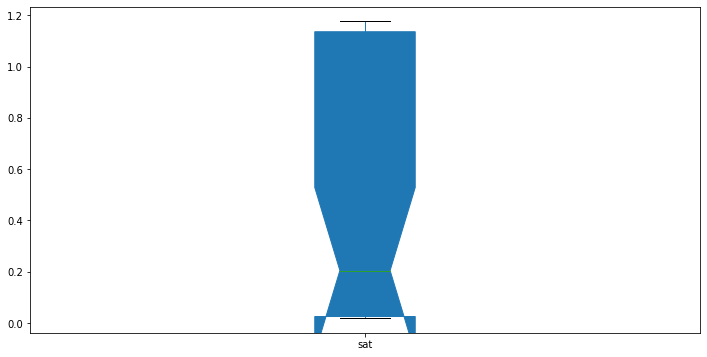

In [6]:
bdf = pd.DataFrame(big.get_test_results())
axs = bdf['sat'].plot(kind="box", notch=True, patch_artist=True)

In [ ]:
solver = su.SudokuSolver(method='deductive')
big.run_tests(solver, callback=update_progress)
bdf = pd.DataFrame(big.get_test_results())
axs = bdf[['sat', 'deductive']].plot(kind="box", notch=True, patch_artist=True)

Oh...my...gawd...3.2 hours on a single puzzle. That's about how long it takes me to solve a normal Sudoku manually. :)


In [ ]:
show_results(big) #bdf.sort_values(by='deductive', ascending=False).head(n=20))